In [14]:

import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../Data/Clean/Clean_data.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17577 entries, 0 to 17576
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   survey_code               17577 non-null  int64  
 1   age                       17577 non-null  int64  
 2   gender                    17577 non-null  int64  
 3   height                    17577 non-null  float64
 4   weight                    17577 non-null  float64
 5   bmi                       17577 non-null  float64
 6   waist_size                17577 non-null  float64
 7   blood_pressure            17577 non-null  float64
 8   heart_rate                17577 non-null  float64
 9   cholesterol               17577 non-null  float64
 10  glucose                   17577 non-null  float64
 11  insulin                   17577 non-null  float64
 12  sleep_hours               17577 non-null  float64
 13  sleep_quality             17577 non-null  int64  
 14  work_h

In [16]:
df['target'].value_counts()

target
healthy     12383
diseased     5194
Name: count, dtype: int64

In [17]:
# Split the data into healthy and diseased groups
healthy = df[df['target'] == 'healthy']
diseased = df[df['target'] == 'diseased']

In [18]:
# List of features to test
features_to_test = ['bmi', 'sleep_hours', 'physical_activity', 'sugar_intake', 'stress_level']

In [19]:
# Select numerical columns only 
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['survey_code'], errors='ignore')

In [20]:

ttest_results = []

for feature in features_to_test:
    t_stat, p_value = ttest_ind(healthy[feature], diseased[feature], equal_var=False)
    ttest_results.append({
        'Feature': feature,
        'T-statistic': round(t_stat, 4),
        'P-value': round(p_value, 6),
        'Significant (p < 0.05)': p_value < 0.05
    })

# Create a DataFrame 
ttest_df = pd.DataFrame(ttest_results)
ttest_df


,Feature,T-statistic,P-value,Significant (p < 0.05)
0,bmi,0.2449,0.806546,False
1,sleep_hours,-0.8860,0.375660,False
2,physical_activity,-0.3372,0.736004,False
3,sugar_intake,0.9000,0.368152,False
4,stress_level,1.1844,0.236290,False


In [21]:
ttest_df = pd.DataFrame(ttest_results).sort_values(by='P-value')
print(ttest_df.to_string(index=False))

          Feature  T-statistic  P-value  Significant (p < 0.05)
     stress_level       1.1844 0.236290                   False
     sugar_intake       0.9000 0.368152                   False
      sleep_hours      -0.8860 0.375660                   False
physical_activity      -0.3372 0.736004                   False
              bmi       0.2449 0.806546                   False


In [30]:
ttest_df["|T-statistic|"] = ttest_df["T-statistic"].abs()

# Sort by absolute t-statistic to find the strongest relationship
ttest_sorted = ttest_df.sort_values(by="|T-statistic|", ascending=False).reset_index(drop=True)
ttest_sorted[["Feature", "|T-statistic|", "P-value", "Significant (p < 0.05)"]]


,Feature,|T-statistic|,P-value,Significant (p < 0.05)
0,stress_level,1.1844,0.236290,False
1,sugar_intake,0.9000,0.368152,False
2,sleep_hours,0.8860,0.375660,False
3,physical_activity,0.3372,0.736004,False
4,bmi,0.2449,0.806546,False


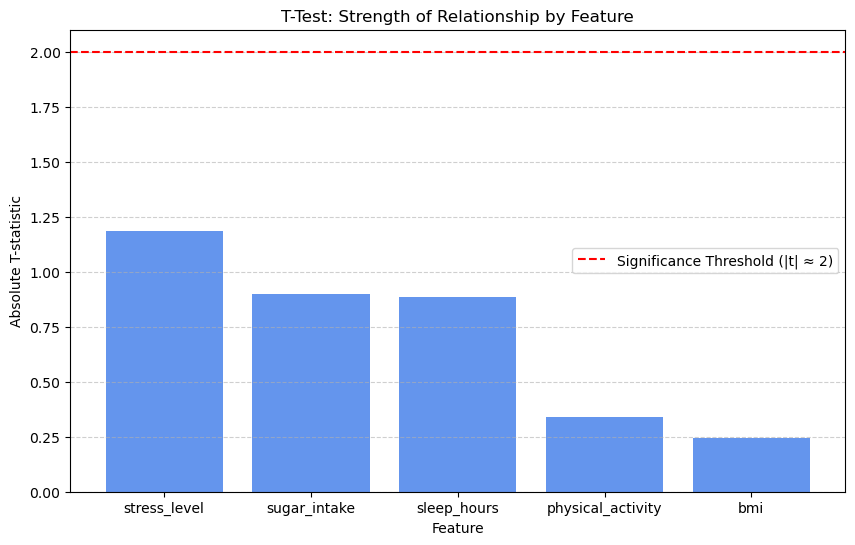

In [31]:
# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(ttest_sorted["Feature"], ttest_sorted["|T-statistic|"], color='cornflowerblue')
plt.axhline(y=2, color='red', linestyle='--', label='Significance Threshold (|t| ≈ 2)')
plt.title("T-Test: Strength of Relationship by Feature")
plt.xlabel("Feature")
plt.ylabel("Absolute T-statistic")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()

In [ ]:
#The feature with the strongest relationship is stress_level, based on the highest absolute t-statistic of 1.1844.